In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('marketing_campaign.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
pd.set_option('display.max_columns',40)

In [3]:
data = pd.read_csv('marketing_campaign.csv',sep="\t")
data.shape

(2240, 29)

In [4]:
desc = pd.DataFrame(index = list(data))
desc['count'] = data.count()
desc['nunique'] = data.nunique()
desc['%unique'] = desc['nunique'] / len(data) * 100
desc['null'] = data.isnull().sum()
desc['%null'] = desc['null'] / len(data) * 100
desc['type'] = data.dtypes
desc = pd.concat([desc, data.describe().T.drop('count', axis = 1)], axis = 1)
desc

count  nunique     %unique  null     %null     type  \
ID                    2240     2240  100.000000     0  0.000000    int64   
Year_Birth            2240       59    2.633929     0  0.000000    int64   
Education             2240        5    0.223214     0  0.000000   object   
Marital_Status        2240        8    0.357143     0  0.000000   object   
Income                2216     1974   88.125000    24  1.071429  float64   
Kidhome               2240        3    0.133929     0  0.000000    int64   
Teenhome              2240        3    0.133929     0  0.000000    int64   
Dt_Customer           2240      663   29.598214     0  0.000000   object   
Recency               2240      100    4.464286     0  0.000000    int64   
MntWines              2240      776   34.642857     0  0.000000    int64   
MntFruits             2240      158    7.053571     0  0.000000    int64   
MntMeatProducts       2240      558   24.910714     0  0.000000    int64   
MntFishProducts       2240      182    8.125000     0  0.000000    int64   
MntSweetProducts      2240      177    7.901786     0  0.000000    int64   
MntGoldProds          2240      213    9.508929     0  0.000000    int64   
NumDealsPurchases     2240       15    0.669643     0  0.000000    int64   
NumWebPurchases       2240       15    0.669643     0  0.000000    int64   
NumCatalogPurchases   2240       14    0.625000     0  0.000000    int64   
NumStorePurchases     2240       14    0.625000     0  0.000000    int64   
NumWebVisitsMonth     2240       16    0.714286     0  0.000000    int64   
AcceptedCmp3          2240        2    0.089286     0  0.000000    int64   
AcceptedCmp4          2240        2    0.089286     0  0.000000    int64   
AcceptedCmp5          2240        2    0.089286     0  0.000000    int64   
AcceptedCmp1          2240        2    0.089286     0  0.000000    int64   
AcceptedCmp2          2240        2    0.089286     0  0.000000    int64   
Complain              2240        2    0.089286     0  0.000000    int64   
Z_CostContact         2240        1    0.044643     0  0.000000    int64   
Z_Revenue             2240        1    0.044643     0  0.000000    int64   
Response              2240        2    0.089286     0  0.000000    int64   

                             mean           std     min       25%      50%  \
ID                    5592.159821   3246.662198     0.0   2828.25   5458.5   
Year_Birth            1968.805804     11.984069  1893.0   1959.00   1970.0   
Education                     NaN           NaN     NaN       NaN      NaN   
Marital_Status                NaN           NaN     NaN       NaN      NaN   
Income               52247.251354  25173.076661  1730.0  35303.00  51381.5   
Kidhome                  0.444196      0.538398     0.0      0.00      0.0   
Teenhome                 0.506250      0.544538     0.0      0.00      0.0   
Dt_Customer                   NaN           NaN     NaN       NaN      NaN   
Recency                 49.109375     28.962453     0.0     24.00     49.0   
MntWines               303.935714    336.597393     0.0     23.75    173.5   
MntFruits               26.302232     39.773434     0.0      1.00      8.0   
MntMeatProducts        166.950000    225.715373     0.0     16.00     67.0   
MntFishProducts         37.525446     54.628979     0.0      3.00     12.0   
MntSweetProducts        27.062946     41.280498     0.0      1.00      8.0   
MntGoldProds            44.021875     52.167439     0.0      9.00     24.0   
NumDealsPurchases        2.325000      1.932238     0.0      1.00      2.0   
NumWebPurchases          4.084821      2.778714     0.0      2.00      4.0   
NumCatalogPurchases      2.662054      2.923101     0.0      0.00      2.0   
NumStorePurchases        5.790179      3.250958     0.0      3.00      5.0   
NumWebVisitsMonth        5.316518      2.426645     0.0      3.00      6.0   
AcceptedCmp3             0.072768      0.259813     0.0      0.00      0.0   
AcceptedCmp4            

In [5]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [6]:
data = data.dropna()

In [7]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))


The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [8]:
dates = pd.to_datetime(dates)

data["Customer_For"] = (dates.max() - dates).days

data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [9]:
data["Age"] = 2021-data["Year_Birth"]

data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

data["Children"]=data["Kidhome"]+data["Teenhome"]

data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"]
data = data.drop(to_drop, axis=1)

In [10]:
data.head()

ID     Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
0  5524      Graduate  58138.0        0         0       58    635      88   
1  2174      Graduate  46344.0        1         1       38     11       1   
2  4141      Graduate  71613.0        0         0       26    426      49   
3  6182      Graduate  26646.0        1         0       26     11       4   
4  5324  Postgraduate  58293.0        1         0       94    173      43   

   Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
0   546   172      88    88                  3                8   
1     6     2       1     6                  2                1   
2   127   111      21    42                  1                8   
3    20    10       3     5                  2                2   
4   118    46      27    15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Customer_For  Age  Spent Living_With  Children  Family_Size  Is_Parent  
0           663   64   1617       Alone         0            1          0  
1           113   67     27       Alone         2            3          1  
2           312   56    776     Partner         0            2          0  
3           139   37     53     Partner         1            3          1  
4           161   40    422     Partner         1            3          1

In [11]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

In [12]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [13]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

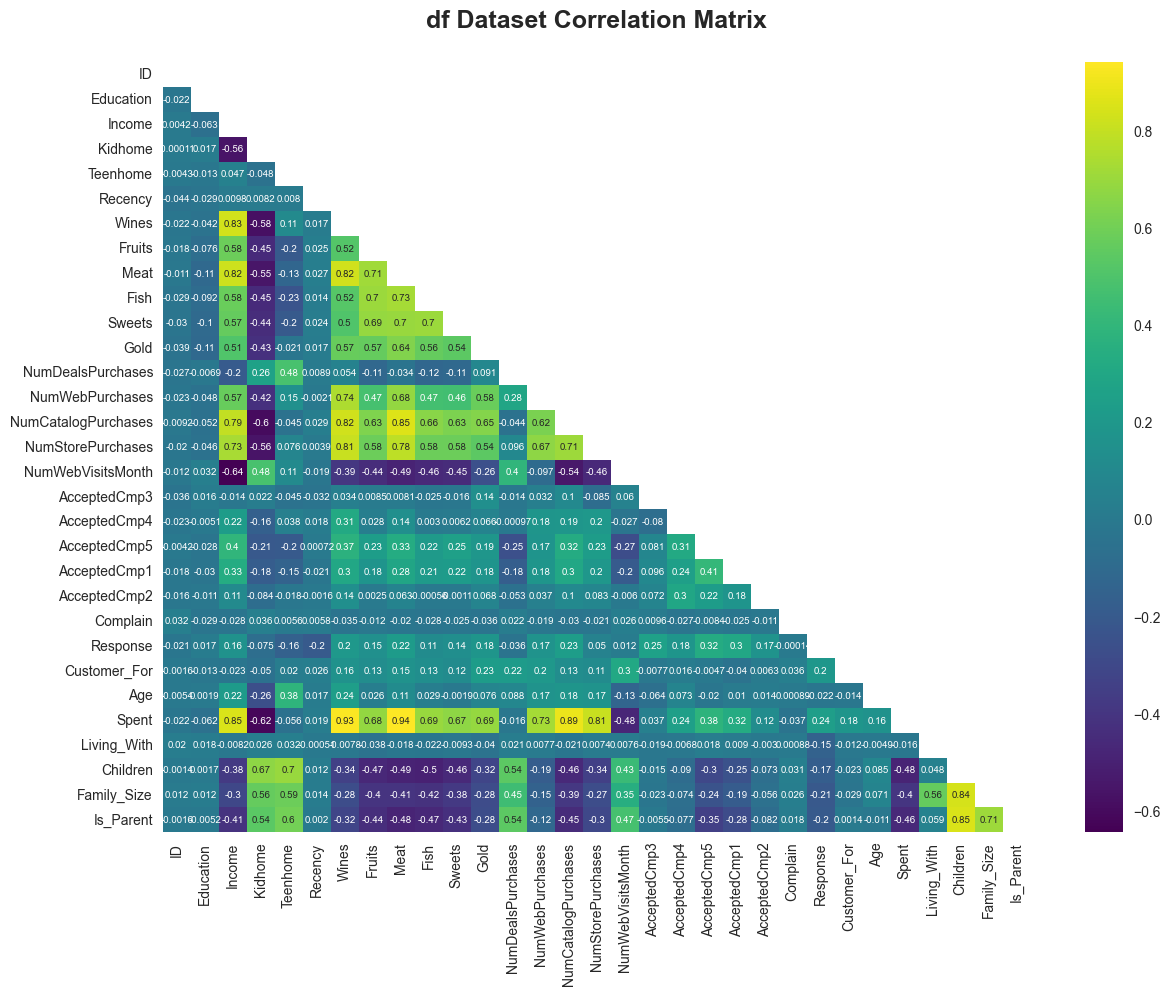

In [14]:
def heatmap(dataset, label = None):
    corr = dataset.corr(method = 'spearman')
    plt.figure(figsize = (14, 10), dpi = 100)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'viridis', annot = True, annot_kws = {'size' : 7})
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize = 18, weight = 'bold')
    plt.show()
heatmap(data, 'df')

In [15]:
ds = data.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [16]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
0  2212.0 -7.066881e-17  2.878610 -5.981314 -2.540562 -0.782425  2.386105   
1  2212.0  4.497106e-17  1.709592 -4.206164 -1.329241 -0.168711  1.223502   
2  2212.0  1.164429e-17  1.232363 -3.700510 -0.854499 -0.056861  0.856897   

        max  
0  7.452993  
1  6.166094  
2  6.634823

In [17]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.34511035, 0.46683467, 0.53008453])

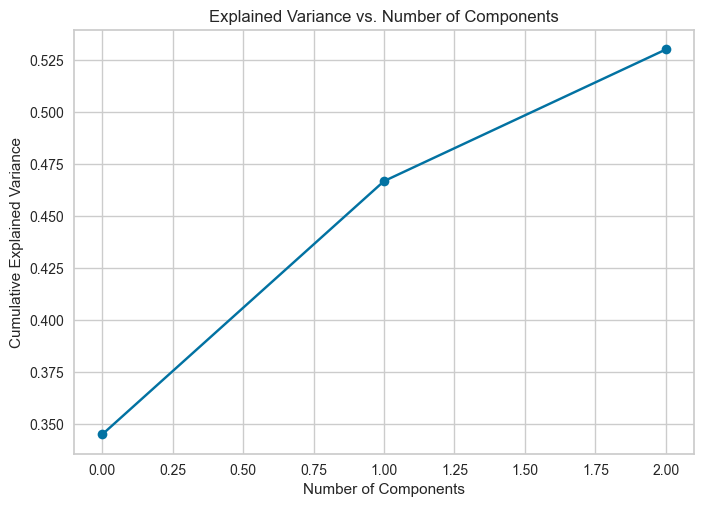

In [18]:
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [19]:
PCA_ds.head()

0         1         2
0  4.986396 -0.160283  2.440575
1 -2.871576  0.037913 -1.461896
2  2.616826 -0.725289 -0.241184
3 -2.655056 -1.458840 -0.414170
4 -0.655778  0.180003 -0.135281

Elbow Method to determine the number of clusters to be formed:


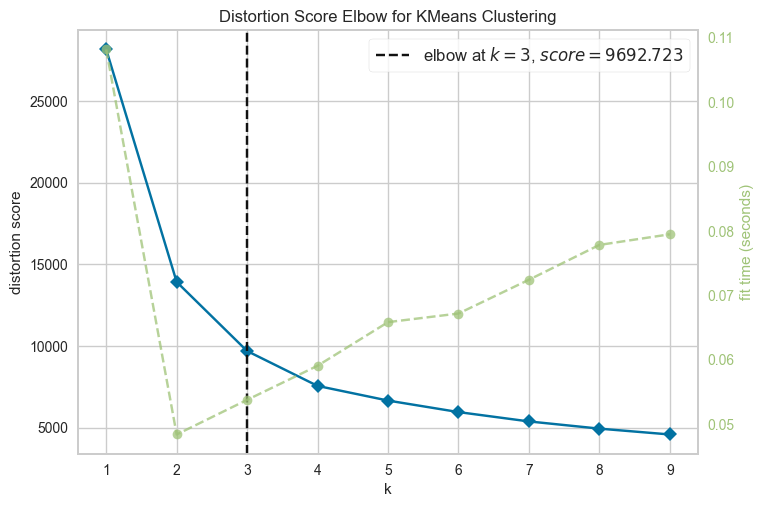

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=(1,10))
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [21]:
from sklearn.cluster import (
    KMeans, AgglomerativeClustering, DBSCAN, MeanShift,
    SpectralClustering, AffinityPropagation, OPTICS
)
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(PCA_ds)
kmeans_score = silhouette_score(PCA_ds, kmeans_labels)

agglomerative = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(PCA_ds)
agglomerative_score = silhouette_score(PCA_ds, agglomerative_labels)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(PCA_ds)
dbscan_score = silhouette_score(PCA_ds, dbscan_labels)

gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(PCA_ds)
gmm_score = silhouette_score(PCA_ds, gmm_labels)

mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(PCA_ds)
mean_shift_score = silhouette_score(PCA_ds, mean_shift_labels)


spectral = SpectralClustering(n_clusters=4, random_state=42)
spectral_labels = spectral.fit_predict(PCA_ds)
spectral_score = silhouette_score(PCA_ds, spectral_labels)
affinity_propagation = AffinityPropagation()
affinity_propagation_labels = affinity_propagation.fit_predict(PCA_ds)
affinity_propagation_score = silhouette_score(PCA_ds, affinity_propagation_labels)

optics = OPTICS(min_samples=5)
optics_labels = optics.fit_predict(PCA_ds)
optics_score = silhouette_score(PCA_ds, optics_labels)
from sklearn_extra.cluster import KMedoids  
fuzzy_cmeans = KMedoids(n_clusters=4, random_state=42)
fuzzy_cmeans_labels = fuzzy_cmeans.fit_predict(PCA_ds)
fuzzy_cmeans_score = silhouette_score(PCA_ds, fuzzy_cmeans_labels)
print("K-Means Silhouette Score:", kmeans_score)
print("Agglomerative Silhouette Score:", agglomerative_score)
print("DBSCAN Silhouette Score:", dbscan_score)
print("GMM Silhouette Score:", gmm_score)
print("Mean Shift Silhouette Score:", mean_shift_score)
print("Spectral Clustering Silhouette Score:", spectral_score)
print("Affinity Propagation Silhouette Score:", affinity_propagation_score)
print("OPTICS Silhouette Score:", optics_score)
print("Fuzzy C-means Silhouette Score:", fuzzy_cmeans_score)

K-Means Silhouette Score: 0.37270696855616325
Agglomerative Silhouette Score: 0.3351450700802982
DBSCAN Silhouette Score: -0.29801645308160857
GMM Silhouette Score: 0.31706623257486005
Mean Shift Silhouette Score: 0.43718318661813255
Spectral Clustering Silhouette Score: 0.36593109285390446
Affinity Propagation Silhouette Score: 0.25575797983513004
OPTICS Silhouette Score: -0.388461445986734
Fuzzy C-means Silhouette Score: 0.37365277956276166


In [22]:
PCA_ds["Clusters"] = kmeans_labels
data["Clusters"]= kmeans_labels

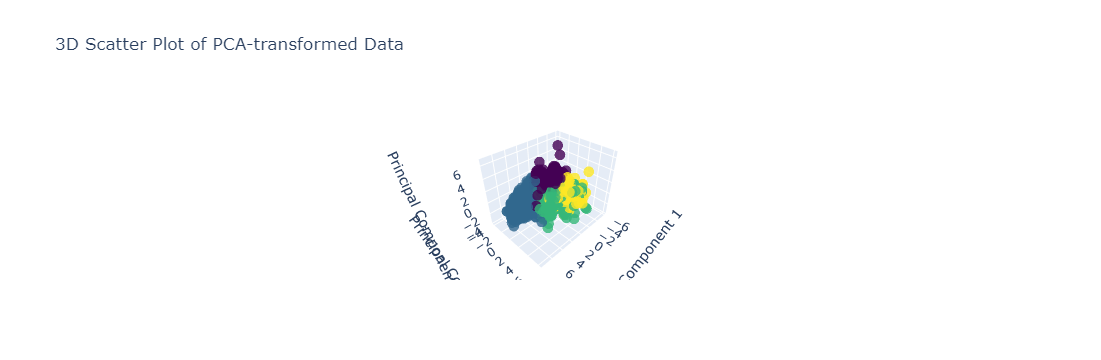

In [23]:
import plotly.graph_objects as go

x = PCA_ds[0]
y = PCA_ds[1]
z = PCA_ds[2]
c = PCA_ds['Clusters']
fig = go.Figure()
scatter = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=6,
        color=c,
        colorscale='Viridis',opacity=0.8
    ),
    name='Data Points'
)
fig.add_trace(scatter)
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    title='3D Scatter Plot of PCA-transformed Data'
)
fig.show()

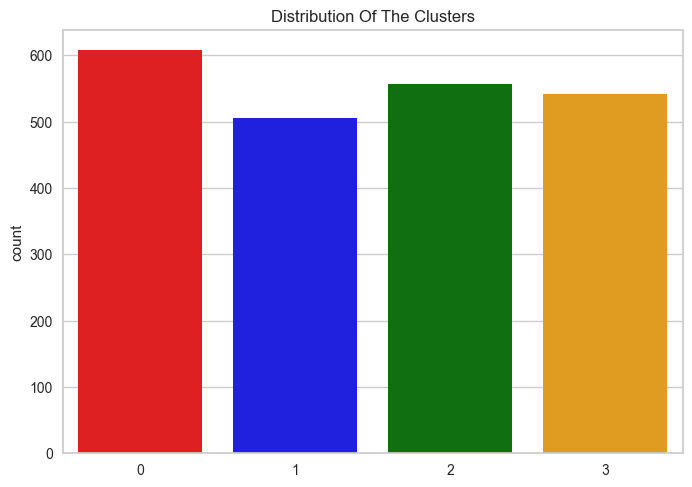

In [24]:
pal = ["red","blue", "green","orange"]
pl = sns.countplot(x=kmeans_labels,palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

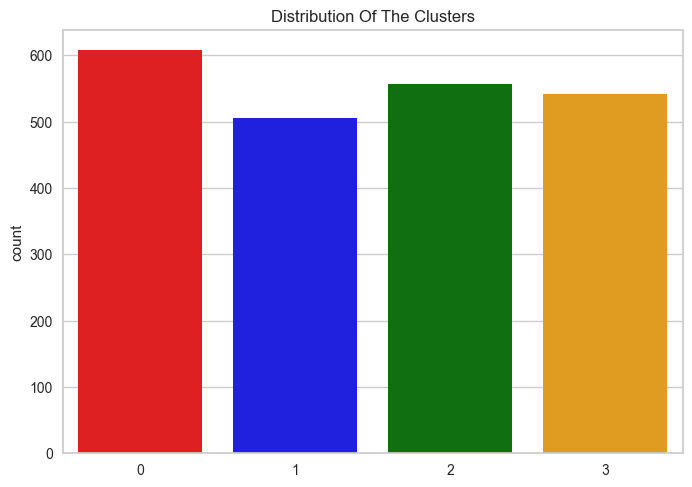

In [25]:
pal = ["red","blue", "green","orange"]
pl = sns.countplot(x=kmeans_labels,palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

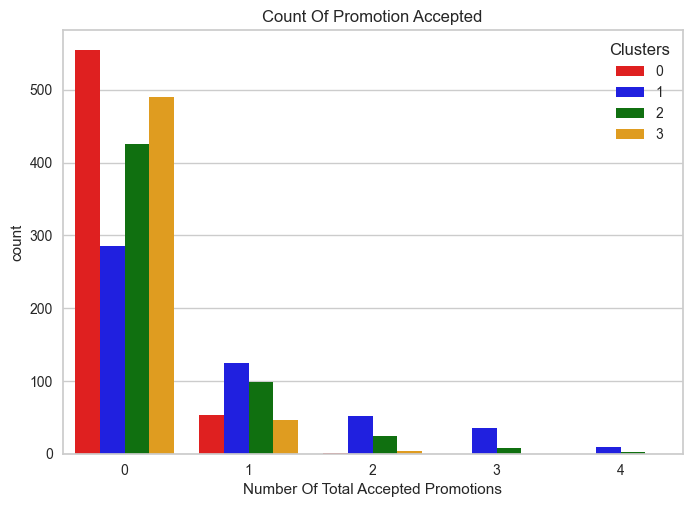

In [26]:
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

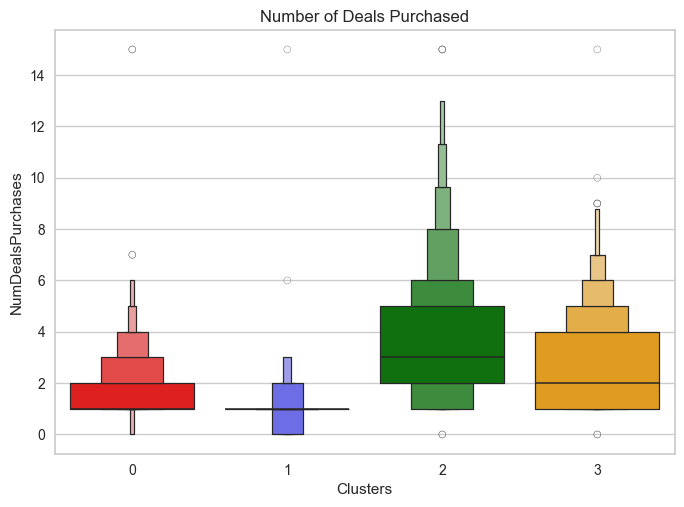

In [27]:
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()


<Figure size 800x550 with 0 Axes>

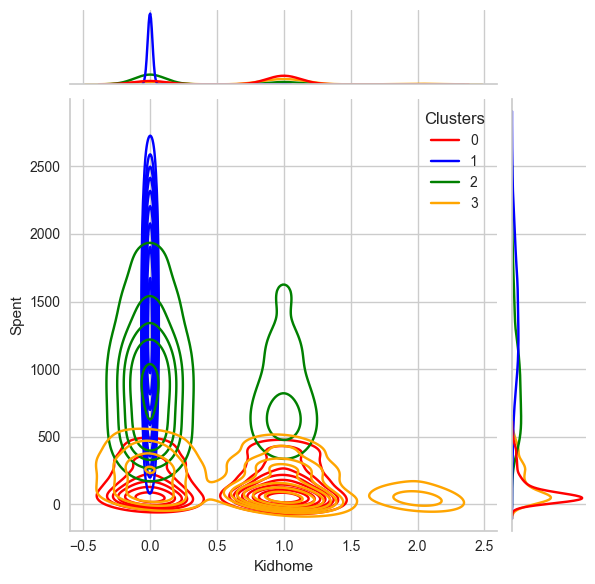

<Figure size 800x550 with 0 Axes>

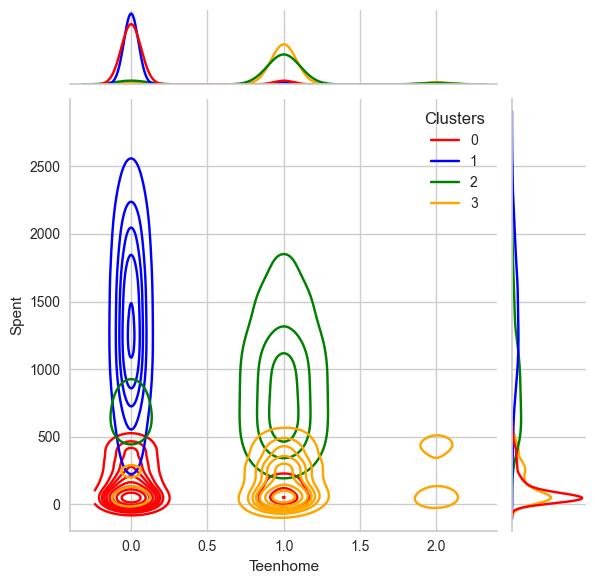

<Figure size 800x550 with 0 Axes>

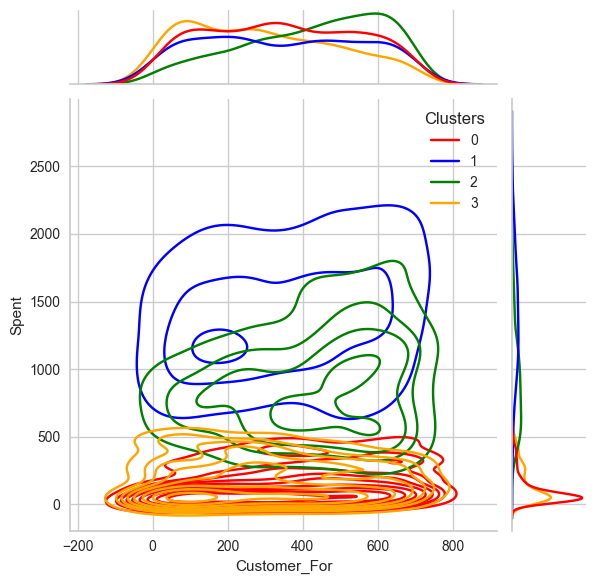

<Figure size 800x550 with 0 Axes>

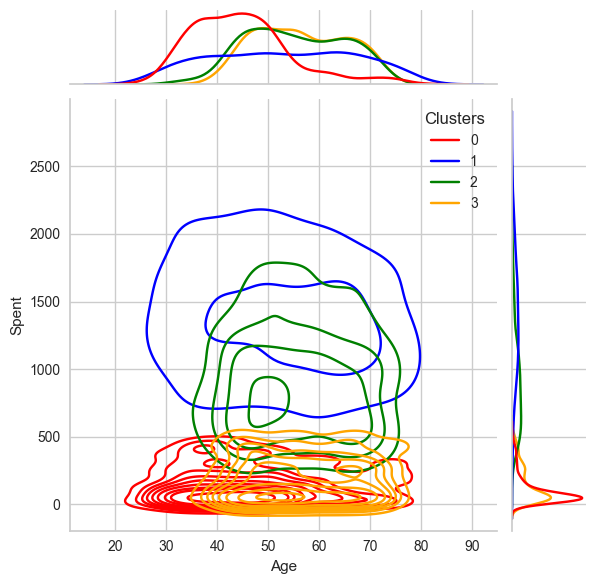

<Figure size 800x550 with 0 Axes>

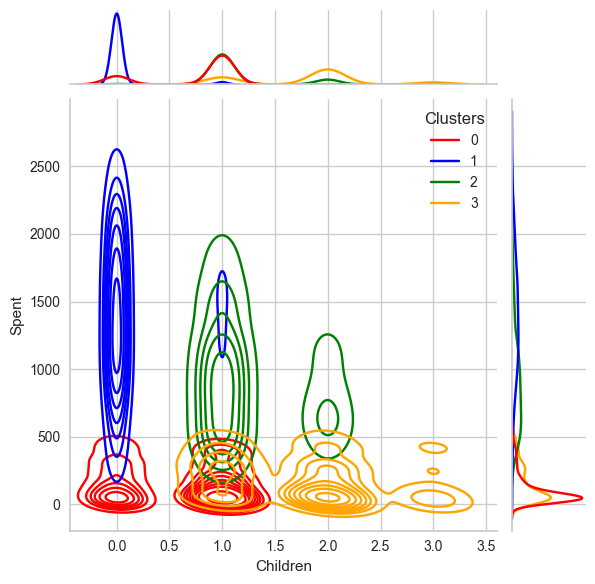

<Figure size 800x550 with 0 Axes>

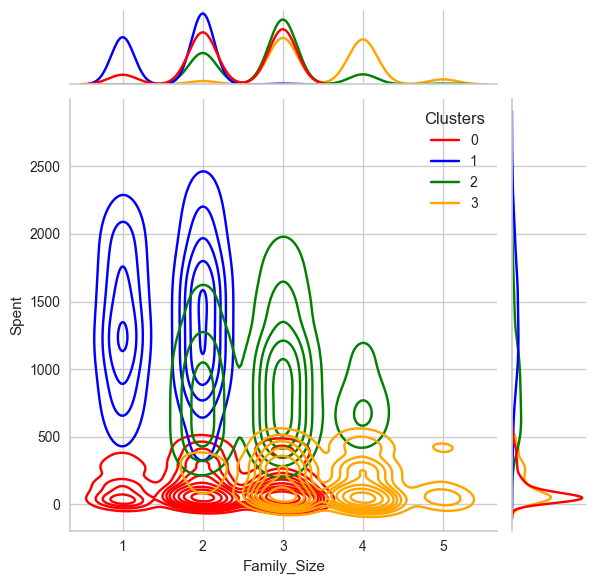

<Figure size 800x550 with 0 Axes>

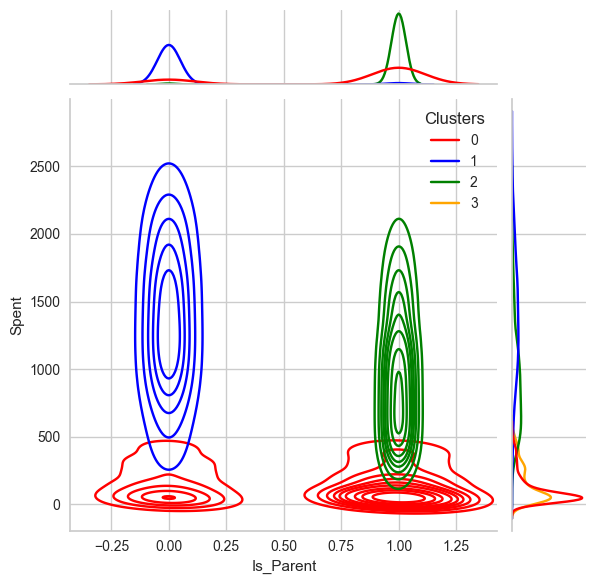

<Figure size 800x550 with 0 Axes>

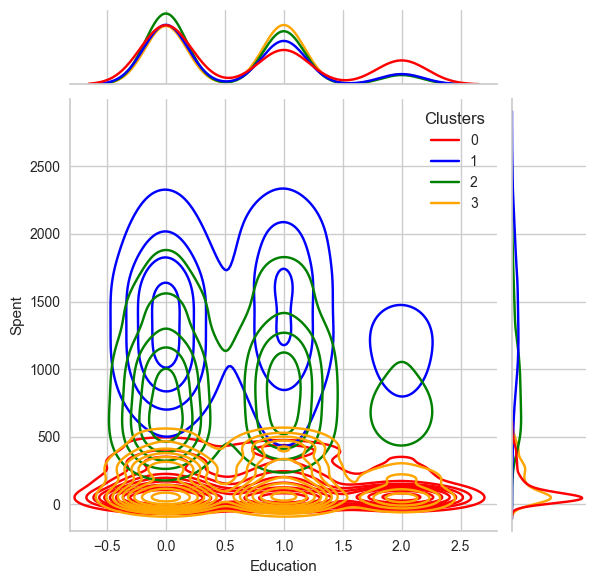

<Figure size 800x550 with 0 Axes>

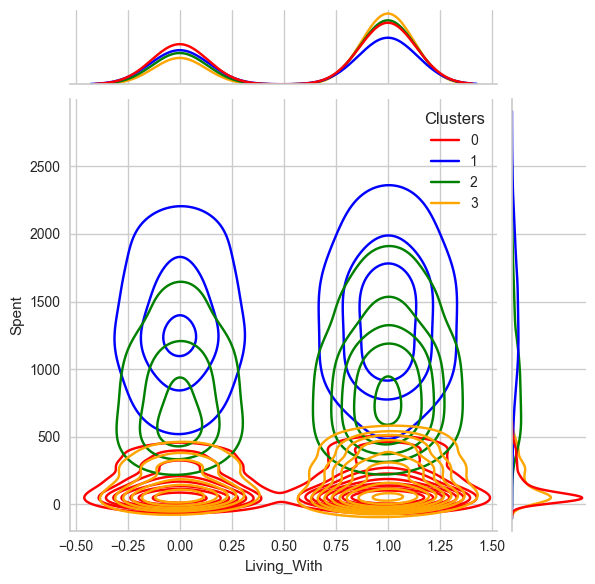

<Figure size 800x550 with 0 Axes>

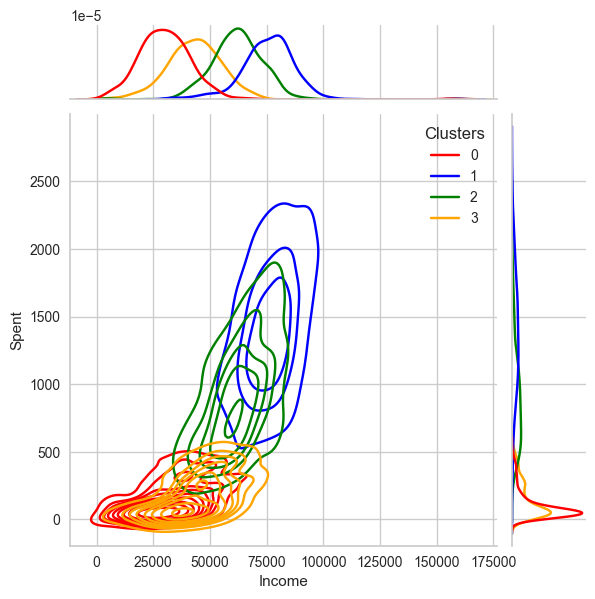

In [28]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With","Income"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

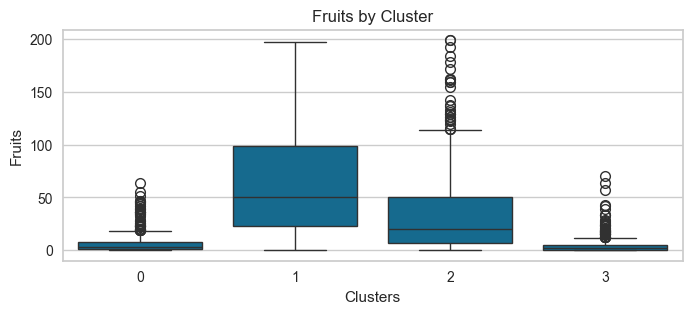

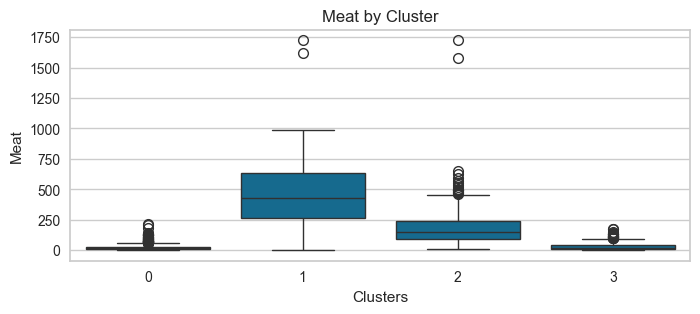

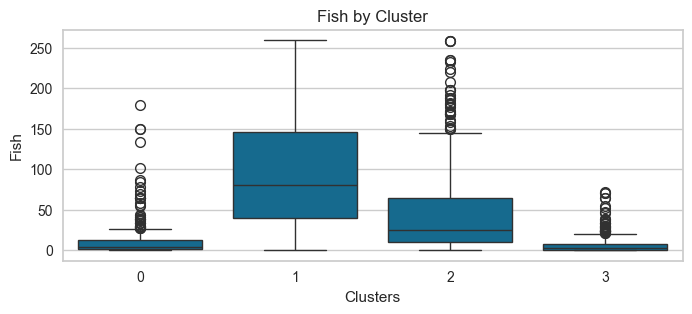

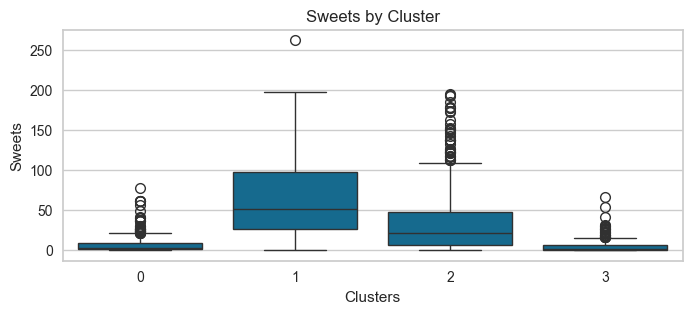

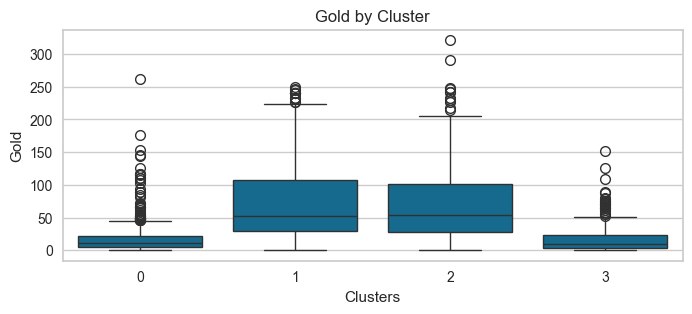

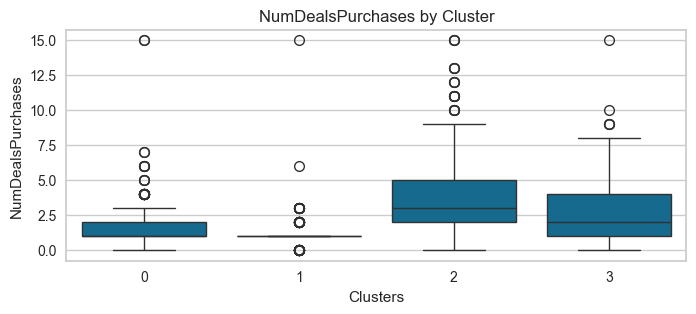

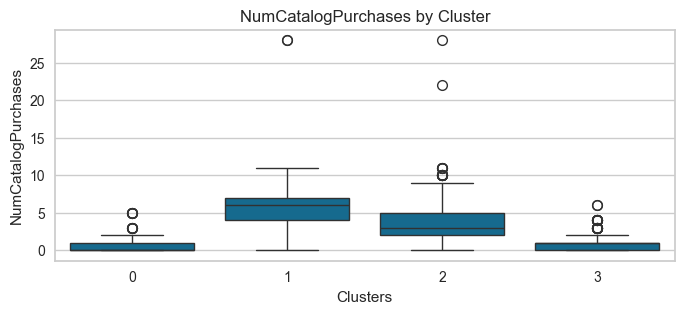

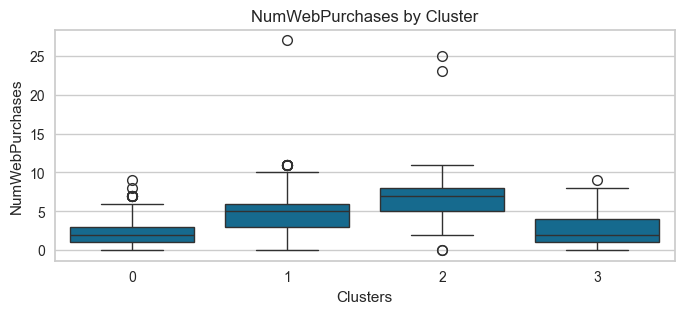

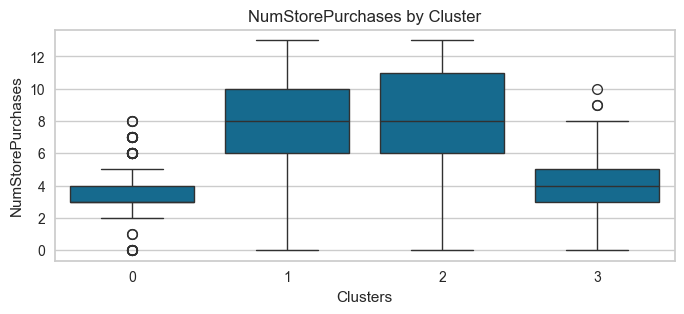

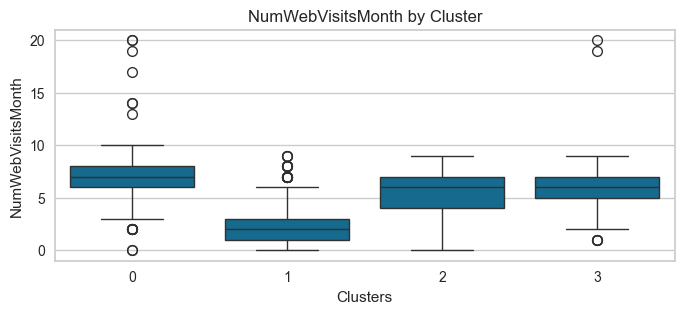

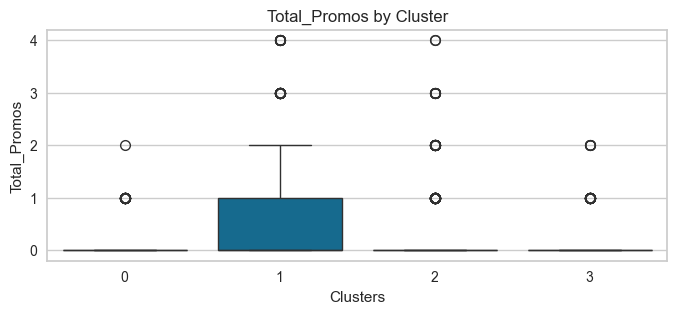

In [29]:
col_to_analyze = ['Fruits','Meat','Fish','Sweets','Gold','NumDealsPurchases','NumCatalogPurchases','NumWebPurchases',
                 'NumStorePurchases','NumWebVisitsMonth','Total_Promos']
for i in col_to_analyze:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x='Clusters', y=i, data=data)
    plt.title(f'{i} by Cluster')
    plt.show()